In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, brier_score_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.font_manager as fm
import matplotlib as mpl

In [2]:
soccer_info = pd.read_csv('C:/Users/USER/Desktop/프로젝트 관련/공모전 데이터/raw_data.csv')
match_info = pd.read_csv('C:/Users/USER/Desktop/프로젝트 관련/공모전 데이터/match_info.csv')

In [3]:
# 각 데이터 확인 해보기

In [4]:
soccer_info

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,end_y,dx,dy,type_name,player_name_ko,team_name_ko,position_name,main_position
0,126288,0,1,1.033,2353,356625.0,Successful,52.670205,34.919632,68.628945,34.347412,15.958740,-0.572220,Pass,이영준,김천 상무 프로축구단,CF,CF
1,126288,1,1,2.433,2353,356612.0,NaN,68.628945,34.347412,68.628945,34.347412,0.000000,0.000000,Pass Received,원두재,김천 상무 프로축구단,CDM,CM
2,126288,2,1,3.033,2353,356612.0,Successful,68.228055,33.853256,65.468865,26.640292,-2.759190,-7.212964,Pass,원두재,김천 상무 프로축구단,CDM,CM
3,126288,3,1,4.333,2353,356618.0,NaN,65.468865,26.640292,65.468865,26.640292,0.000000,0.000000,Pass Received,김진규,김천 상무 프로축구단,CM,CM
4,126288,4,1,4.900,2353,356618.0,Successful,64.838025,26.766636,63.300510,43.018024,-1.537515,16.251388,Pass,김진규,김천 상무 프로축구단,CM,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,Successful,8.762670,2.118390,5.423670,2.112168,-3.339000,-0.006222,Pass,김지현,울산 HD FC,NaN,CF
579302,126291,3100,2,3187.667,2354,500143.0,NaN,5.423670,2.112168,5.423670,2.112168,0.000000,0.000000,Pass Received,심상민,울산 HD FC,NaN,LB
579303,126291,3101,2,3187.668,2354,500143.0,NaN,5.423670,2.112168,1.041810,9.064876,-4.381860,6.952708,Carry,심상민,울산 HD FC,NaN,LB
579304,126291,3102,2,3189.467,2354,500143.0,Unsuccessful,1.041810,9.064876,7.936215,40.583964,6.894405,31.519088,Cross,심상민,울산 HD FC,NaN,LB


In [5]:
match_info

,game_id,season_id,competition_id,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,competition_name,country_name,season_name,home_team_name,home_team_name_ko,away_team_name,away_team_name_ko
0,126283,3669,587,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,K League 1,KR,2024,Ulsan HD FC,울산 HD FC,Pohang Steelers,포항 스틸러스
1,126284,3669,587,1,2024-03-01 07:30:00,4640,4657,1,1,전주월드컵경기장,K League 1,KR,2024,Jeonbuk Hyundai Motors,전북 현대 모터스,Daejeon Hana Citizen,대전 하나 시티즌
2,126285,3669,587,1,2024-03-02 05:00:00,4648,316,2,0,광주전용구장,K League 1,KR,2024,Gwangju FC,광주FC,FC Seoul,FC서울
3,126286,3669,587,1,2024-03-02 07:30:00,4646,4220,0,1,인천축구전용경기장,K League 1,KR,2024,Incheon United,인천 유나이티드,Suwon FC,수원FC
4,126287,3669,587,1,2024-03-02 07:30:00,4643,4641,1,1,송암스포츠타운 주경기장,K League 1,KR,2024,Gangwon FC,강원FC,Jeju United,제주SK FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,126477,3669,587,33,2024-10-06 06:00:00,4644,4640,4,3,DGB대구은행파크,K League 1,KR,2024,Daegu FC,대구FC,Jeonbuk Hyundai Motors,전북 현대 모터스
194,126476,3669,587,33,2024-10-06 06:00:00,4648,316,3,1,광주전용구장,K League 1,KR,2024,Gwangju FC,광주FC,FC Seoul,FC서울
195,126478,3669,587,33,2024-10-06 06:00:00,4646,4643,1,3,인천축구전용경기장,K League 1,KR,2024,Incheon United,인천 유나이티드,Gangwon FC,강원FC
196,126479,3669,587,33,2024-10-06 06:00:00,4641,4657,2,1,제주월드컵경기장,K League 1,KR,2024,Jeju United,제주SK FC,Daejeon Hana Citizen,대전 하나 시티즌


In [6]:
# 결측이 있는지 확인 해 보기

In [7]:
soccer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579306 entries, 0 to 579305
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   game_id         579306 non-null  int64  
 1   action_id       579306 non-null  int64  
 2   period_id       579306 non-null  int64  
 3   time_seconds    579306 non-null  float64
 4   team_id         579306 non-null  int64  
 5   player_id       579305 non-null  float64
 6   result_name     229702 non-null  object 
 7   start_x         579306 non-null  float64
 8   start_y         579306 non-null  float64
 9   end_x           579306 non-null  float64
 10  end_y           579306 non-null  float64
 11  dx              579306 non-null  float64
 12  dy              579306 non-null  float64
 13  type_name       579306 non-null  object 
 14  player_name_ko  579305 non-null  object 
 15  team_name_ko    579306 non-null  object 
 16  position_name   509186 non-null  object 
 17  main_posit

In [8]:
# player_id, result_name, player_name_ko, position_name, main_position에서 결측 확인

In [9]:
match_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            198 non-null    int64 
 1   season_id          198 non-null    int64 
 2   competition_id     198 non-null    int64 
 3   game_day           198 non-null    int64 
 4   game_date          198 non-null    object
 5   home_team_id       198 non-null    int64 
 6   away_team_id       198 non-null    int64 
 7   home_score         198 non-null    int64 
 8   away_score         198 non-null    int64 
 9   venue              198 non-null    object
 10  competition_name   198 non-null    object
 11  country_name       198 non-null    object
 12  season_name        198 non-null    int64 
 13  home_team_name     198 non-null    object
 14  home_team_name_ko  198 non-null    object
 15  away_team_name     198 non-null    object
 16  away_team_name_ko  198 non-null    object
dt

In [10]:
# 결측이 없는 것을 확인 

In [11]:
# 승점 계산

In [12]:
# 홈 팀 관점
home = match_info[['home_team_id','home_team_name_ko','home_score','away_score']].copy()
home.columns = ['팀_id', '팀명', '득점', '실점']

# 어웨이 팀 관점
away = match_info[['away_team_id','away_team_name_ko','away_score','home_score']].copy()
away.columns = ['팀_id', '팀명', '득점', '실점']


In [13]:
# 3. 팀 기준 경기 데이터 (경기당 2행)

team_match = pd.concat([home, away], ignore_index=True)


# 4. 승점 계산

team_match['승점'] = np.where(team_match['득점'] > team_match['실점'], 3,
                            np.where(team_match['득점'] == team_match['실점'], 1, 0))


# 5. 팀별 시즌 성적 집계

league_table = (team_match.groupby(['팀_id', '팀명']).agg(경기수=('승점', 'count'),
                                                       승점=('승점', 'sum'),
                                                       득점=('득점', 'sum'),
                                                       실점=('실점', 'sum')).reset_index())


# 6. 득실차 계산

league_table['득실차'] = league_table['득점'] - league_table['실점']


# 7. 순위 정렬

league_table = league_table.sort_values(by=['승점', '득실차', '득점'],
                                        ascending=[False, False, False]).reset_index(drop=True)


# 8. 순위 컬럼 추가

league_table['순위'] = league_table.index + 1

league_table


,팀_id,팀명,경기수,승점,득점,실점,득실차,순위
0,2354,울산 HD FC,33,61,53,36,17,1
1,2353,김천 상무 프로축구단,33,56,50,37,13,2
2,4643,강원FC,33,55,58,50,8,3
3,4639,포항 스틸러스,33,51,51,42,9,4
4,316,FC서울,33,50,49,38,11,5
5,4220,수원FC,33,49,47,50,-3,6
6,4648,광주FC,33,43,40,46,-6,7
7,4641,제주SK FC,33,41,32,49,-17,8
8,4644,대구FC,33,38,40,42,-2,9
9,4640,전북 현대 모터스,33,37,45,54,-9,10


In [14]:
# 한글 폰트 설정 (Windows)
mpl.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

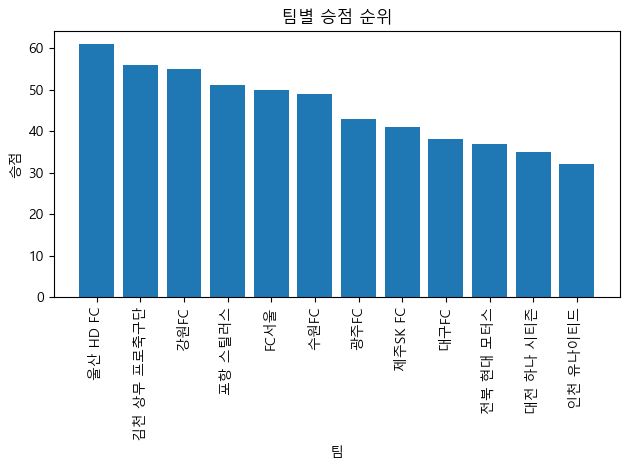

In [15]:
viz_df = league_table.sort_values('순위')

plt.figure()
plt.bar(viz_df['팀명'], viz_df['승점'])
plt.xticks(rotation=90)
plt.xlabel('팀')
plt.ylabel('승점')
plt.title('팀별 승점 순위')

plt.tight_layout()
plt.show()

In [16]:
# match_info 데이터를 raw 데이터에 결합 시키기전 중복 되거나 필요 없는 열 제거

In [17]:
match_info_fix = match_info.drop(columns=["season_id",
                                          "competition_id",
                                          "competition_name",
                                          "country_name",
                                          "home_team_name",
                                          "season_name",
                                          "away_team_name"])

In [18]:
match_info_fix

,game_id,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,home_team_name_ko,away_team_name_ko
0,126283,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,울산 HD FC,포항 스틸러스
1,126284,1,2024-03-01 07:30:00,4640,4657,1,1,전주월드컵경기장,전북 현대 모터스,대전 하나 시티즌
2,126285,1,2024-03-02 05:00:00,4648,316,2,0,광주전용구장,광주FC,FC서울
3,126286,1,2024-03-02 07:30:00,4646,4220,0,1,인천축구전용경기장,인천 유나이티드,수원FC
4,126287,1,2024-03-02 07:30:00,4643,4641,1,1,송암스포츠타운 주경기장,강원FC,제주SK FC
...,...,...,...,...,...,...,...,...,...,...
193,126477,33,2024-10-06 06:00:00,4644,4640,4,3,DGB대구은행파크,대구FC,전북 현대 모터스
194,126476,33,2024-10-06 06:00:00,4648,316,3,1,광주전용구장,광주FC,FC서울
195,126478,33,2024-10-06 06:00:00,4646,4643,1,3,인천축구전용경기장,인천 유나이티드,강원FC
196,126479,33,2024-10-06 06:00:00,4641,4657,2,1,제주월드컵경기장,제주SK FC,대전 하나 시티즌


In [19]:
# 두 데이터를 합치기
soccer_df = soccer_info.merge(match_info_fix, on='game_id', how = 'left')

In [20]:
soccer_df

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,main_position,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,home_team_name_ko,away_team_name_ko
0,126288,0,1,1.033,2353,356625.0,Successful,52.670205,34.919632,68.628945,...,CF,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단
1,126288,1,1,2.433,2353,356612.0,NaN,68.628945,34.347412,68.628945,...,CM,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단
2,126288,2,1,3.033,2353,356612.0,Successful,68.228055,33.853256,65.468865,...,CM,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단
3,126288,3,1,4.333,2353,356618.0,NaN,65.468865,26.640292,65.468865,...,CM,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단
4,126288,4,1,4.900,2353,356618.0,Successful,64.838025,26.766636,63.300510,...,CM,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,Successful,8.762670,2.118390,5.423670,...,CF,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC
579302,126291,3100,2,3187.667,2354,500143.0,NaN,5.423670,2.112168,5.423670,...,LB,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC
579303,126291,3101,2,3187.668,2354,500143.0,NaN,5.423670,2.112168,1.041810,...,LB,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC
579304,126291,3102,2,3189.467,2354,500143.0,Unsuccessful,1.041810,9.064876,7.936215,...,LB,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC


In [21]:
# 경기 time_seconds 변수가 초 단위로 쭉 나열 되어있어 보기 힘듬 -> 축구 중계때 나오는 분 단위로 바꿔준다
def format_time(x):
    minutes = int(x // 60)
    seconds_total = x % 60 

    sec_int = int(seconds_total)                # 초 정수부
    sec_frac = seconds_total - sec_int          # 소수부

    # 초 정수부: 항상 2자리
    sec_int_str = f"{sec_int:02d}"

    # 초 소수부: 2자리로 고정
    sec_frac_str = f"{sec_frac:.2f}"[1:]        # '0.xxx' → '.xxx'

    return f"{minutes:02d}:{sec_int_str}{sec_frac_str}"


In [22]:
soccer_df["time"] = soccer_df["time_seconds"].apply(format_time)

In [23]:
soccer_df

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,home_team_name_ko,away_team_name_ko,time
0,126288,0,1,1.033,2353,356625.0,Successful,52.670205,34.919632,68.628945,...,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:01.03
1,126288,1,1,2.433,2353,356612.0,NaN,68.628945,34.347412,68.628945,...,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:02.43
2,126288,2,1,3.033,2353,356612.0,Successful,68.228055,33.853256,65.468865,...,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:03.03
3,126288,3,1,4.333,2353,356618.0,NaN,65.468865,26.640292,65.468865,...,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.33
4,126288,4,1,4.900,2353,356618.0,Successful,64.838025,26.766636,63.300510,...,1,2024-03-03 05:00:00,4644,2353,0,1,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,Successful,8.762670,2.118390,5.423670,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:06.53
579302,126291,3100,2,3187.667,2354,500143.0,NaN,5.423670,2.112168,5.423670,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67
579303,126291,3101,2,3187.668,2354,500143.0,NaN,5.423670,2.112168,1.041810,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67
579304,126291,3102,2,3189.467,2354,500143.0,Unsuccessful,1.041810,9.064876,7.936215,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:09.47


In [24]:
#soccer_df.to_csv('C:/Users/USER/Desktop/프로젝트 관련/공모전 데이터/soccer_df.csv')

In [25]:
# 두 데이터를 합칠때 home, away_score가 같이 쫘라락 붙는데 득점시 점수를 표기하도록 만드려 한다
# game_id별 result_named이 Goal일때 team_id와 home,away_id가 일치할때 home,away_score에 점수 기록만들기
soccer_df['home_score'] = 0
soccer_df['away_score'] = 0

In [26]:
#result_name 정규화 = 대소문자 모두 대응가능하게
soccer_df['result_name'] = soccer_df['result_name'].astype(str).str.lower().str.strip()
soccer_df['type_name'] = soccer_df['type_name'].astype(str).str.lower().str.strip()

In [27]:
soccer_df['homegoal'] = ((soccer_df['result_name'] == 'goal') &
                        (soccer_df['team_id'] == soccer_df['home_team_id'])).astype(int)
soccer_df['awaygoal'] = ((soccer_df['result_name'] == 'goal') &
                        (soccer_df['team_id'] == soccer_df['away_team_id'])).astype(int)

In [28]:
soccer_df['home_score'] = soccer_df.groupby('game_id')['homegoal'].cumsum()
soccer_df['away_score'] = soccer_df.groupby('game_id')['awaygoal'].cumsum()

In [29]:
soccer_df = soccer_df.drop(columns=['homegoal', 'awaygoal'], axis=1)

In [30]:
soccer_df

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,home_team_name_ko,away_team_name_ko,time
0,126288,0,1,1.033,2353,356625.0,successful,52.670205,34.919632,68.628945,...,1,2024-03-03 05:00:00,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:01.03
1,126288,1,1,2.433,2353,356612.0,nan,68.628945,34.347412,68.628945,...,1,2024-03-03 05:00:00,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:02.43
2,126288,2,1,3.033,2353,356612.0,successful,68.228055,33.853256,65.468865,...,1,2024-03-03 05:00:00,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:03.03
3,126288,3,1,4.333,2353,356618.0,nan,65.468865,26.640292,65.468865,...,1,2024-03-03 05:00:00,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.33
4,126288,4,1,4.900,2353,356618.0,successful,64.838025,26.766636,63.300510,...,1,2024-03-03 05:00:00,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,successful,8.762670,2.118390,5.423670,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:06.53
579302,126291,3100,2,3187.667,2354,500143.0,nan,5.423670,2.112168,5.423670,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67
579303,126291,3101,2,3187.668,2354,500143.0,nan,5.423670,2.112168,1.041810,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67
579304,126291,3102,2,3189.467,2354,500143.0,unsuccessful,1.041810,9.064876,7.936215,...,2,2024-03-09 07:30:00,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:09.47


In [31]:
## xg값 만들기 
#  xg값에 필요한 변수 생성 작업

In [32]:
shots = soccer_df[soccer_df['type_name'].isin(['shot', 'shot_freekick', 'penalty kick'])].copy()

In [33]:
# 데이터를 보면 홈 어웨이에 따라 공격시 x값이 달라지는데 이것을 통일
pitch_x = 105
pitch_y = 68         # 경기장 마다 축구장 크기가 상이하기때문에 FIFA가 정한 규격 사용

shots['adj_x'] = np.where(shots['team_id'] == shots['home_team_id'],
                          shots['start_x'],
                          pitch_x - shots['start_x'])

shots['adj_y'] = np.where(shots['team_id'] == shots['home_team_id'],
                          shots['start_y'],
                          pitch_y - shots['start_y'])

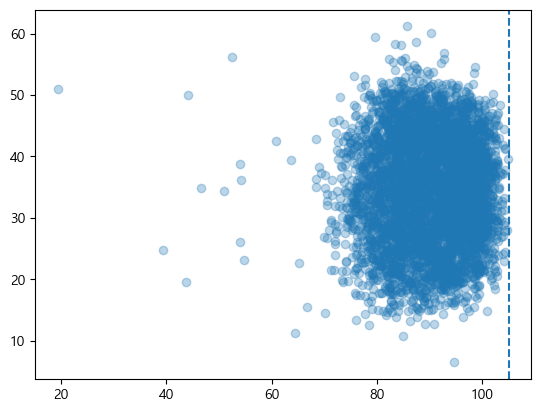

In [34]:
#x값이  되어있는지 확인하기

plt.scatter(shots['adj_x'], shots['adj_y'], alpha=0.3)
plt.axvline(105, linestyle='--')  # 골라인
plt.show()

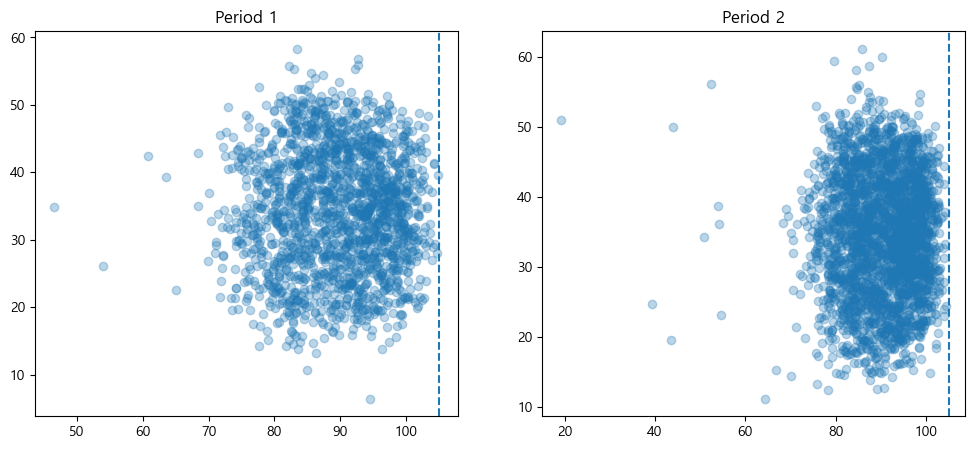

In [35]:
# 전 후반따로 한번 확인 해보기

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, period in enumerate([1, 2]):
    subset = shots[shots['period_id'] == period]
    axes[i].scatter(subset['adj_x'], subset['adj_y'], alpha=0.3)
    axes[i].axvline(105, linestyle='--')
    axes[i].set_title(f'Period {period}')

plt.show()

In [36]:
#전반에 비해 후반이 골대를 기준으로 근처에서 많이 발생한다.

In [37]:
# 좌표와 골대간 거리 계산 = 슈팅 거리 계산 

goal_x = 105
goal_y = 34

shots['shot_meter'] = np.sqrt((goal_x - shots['adj_x'])**2 + (goal_y - shots['adj_y'])**2)

In [38]:
shots['shot_meter'].describe()

count    4584.000000
mean       17.535374
std         7.389372
min         1.118312
25%        11.740384
50%        17.292512
75%        22.785506
max        87.355713
Name: shot_meter, dtype: float64

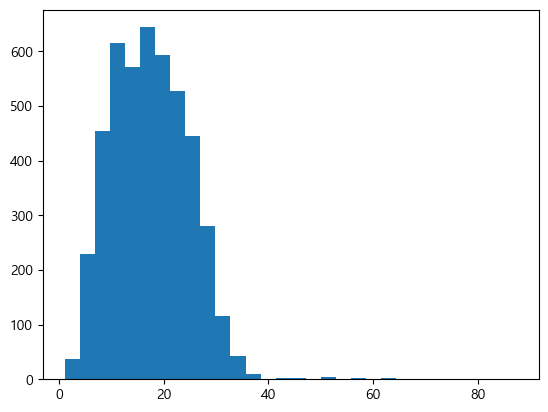

In [39]:
plt.hist(shots['shot_meter'], bins=30)
plt.show()

In [40]:
#골대의 크기는 7.32m 절반은 3.66m

In [41]:
# 슈팅때 각도 계산 

goal_x = 105
goal_y = 34
goal_y_half = 3.66

left_post = goal_y - goal_y_half
right_post = goal_y + goal_y_half

In [42]:
shots['shot_angle'] = np.abs(np.arctan2(right_post - shots['adj_y'], goal_x - shots['adj_x']) -
                             np.arctan2(left_post - shots['adj_y'], goal_x - shots['adj_x']))

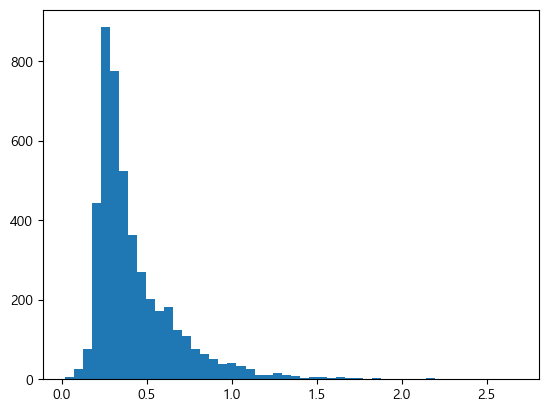

In [43]:
plt.hist(shots['shot_angle'], bins=50)
plt.show()                                   #라디안 각도로 나오기때문에 뭐지 싶겠지만 1라디안 = 약 57도정도 보면 된다.

In [44]:
# 패널티 박스 이냐 아니냐를 만드려고 한다
# 기존에 통일한 좌표도 있고 FIFA에서 정한 규격을 사용해 패널티 박스를 구한다
# 패널티 x축 길이는 16.5, y반지름 20.16(40.32)이다

In [46]:
penalty_x = 16.5
penalty_y = 20.16

shots['penalty_box'] = ((shots['adj_x'] >= goal_x - penalty_x) &
                       (shots['adj_y'] >= goal_y - penalty_y) &
                       (shots['adj_y'] <= goal_y + penalty_y)).astype(int)

In [48]:
shots['result_goal'] = (shots['result_name'] == 'goal').astype(int)

In [50]:
pd.crosstab(shots['penalty_box'],
           shots['result_goal'],
           margins = True)

result_goal,0,1,All
penalty_box,,,
0,1812,85,1897
1,2257,430,2687
All,4069,515,4584


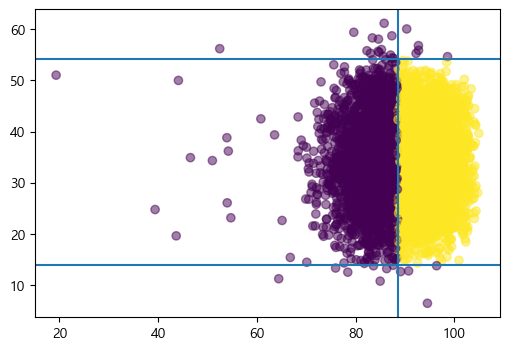

In [102]:
plt.figure(figsize=(6,4))
plt.scatter(shots['adj_x'], shots['adj_y'],
            c=shots['penalty_box'], alpha=0.5)
plt.axvline(goal_x - penalty_x)
plt.axhline(goal_y - penalty_y)
plt.axhline(goal_y + penalty_y)
plt.show()

In [ ]:
# 시각화를 하여 패널티 밖과 안의 분포가 어떤지 살펴 보았다

In [84]:
shots['penaltykick'] = (shots['type_name'] == 'penalty kick').astype(int)

In [86]:
shots['penaltykick'].value_counts()

0    4533
1      51
Name: penaltykick, dtype: int64

In [45]:
# 슈팅 거리와 각도, 패널티 좌표 다 구했으니 이제 xg값을 구해보자

In [46]:
# 슈팅시 골로 들어간 변수를 만들기
shots['result_goal'] = (shots['result_name'] == 'goal').astype(int)

In [47]:
#로지스틱 회귀를 돌려 xg값 구하기

In [87]:
x = shots[['shot_meter', 'shot_angle', 'penalty_box', 'penaltykick']]
y = shots['result_goal']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=40,
                                                    stratify=y)  # game_id로 분리하는 경우도 있지만 

In [88]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [89]:
modle = LogisticRegression(solver='lbfgs', #준-뉴턴법(기울기, 곡률정보 같이사용)
                          max_iter=1000,
                          class_weight='balanced', # goal과 no_goal비율 차이를 보정(두 값이 차이가 크기때문)
                          random_state=40)
modle.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=40)

In [90]:
y_test_pred = modle.predict_proba(x_test_scaled)[:, 1] #acu 대신 logloss,brier score쓰기

print("Log Loss:", log_loss(y_test, y_test_pred))
print("Brier Score:", brier_score_loss(y_test, y_test_pred))

Log Loss: 0.5724631943713001
Brier Score: 0.19344913196784366


In [91]:
x_scaled_all = scaler.fit_transform(x)

modle.fit(x_scaled_all, y)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=40)

In [92]:
shots['xg'] = modle.predict_proba(x_scaled_all)[:, 1]

In [93]:
#계수 해석
coef = pd.Series(modle.coef_[0], index = x.columns)
intercept = modle.intercept_[0]

print(coef)    #거리가 멀면 골 확률 감소
print(intercept) #각도가 크면 골 확률 증가

shot_meter    -0.595261
shot_angle     0.316973
penalty_box   -0.003481
penaltykick    0.348411
dtype: float64
-0.3190553298062171


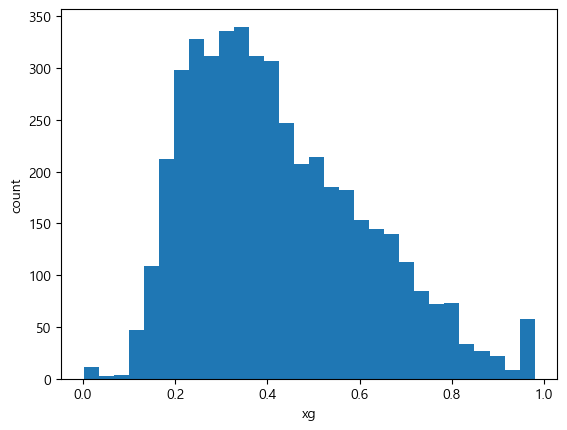

In [94]:
plt.hist(shots['xg'], bins=30)
plt.xlabel('xg')
plt.ylabel('count')
plt.show()

In [95]:
#정확도 검증


In [96]:
auc = roc_auc_score(y, shots['xg'])
print(auc)

0.7504918791621232


In [97]:
#데이터 확인
shots

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,away_team_name_ko,time,adj_x,adj_y,shot_meter,shot_angle,penalty_box,result_goal,xg,penaltykick
212,126288,212,1,374.967,4644,62114.0,off target,97.254150,32.892416,105.000000,...,김천 상무 프로축구단,06:14.97,97.254150,32.892416,7.824636,0.870055,1,0,0.725973,0
466,126288,466,1,1060.300,4644,250055.0,off target,86.624265,24.028208,105.000000,...,김천 상무 프로축구단,17:40.30,86.624265,24.028208,20.907039,0.307397,0,0,0.314865,0
793,126288,793,1,1656.633,4644,62114.0,off target,98.106960,28.697564,105.000000,...,김천 상무 프로축구단,27:36.63,98.106960,28.697564,8.696541,0.681268,1,0,0.660954,0
814,126288,814,1,1721.333,4644,342722.0,on target,95.849880,37.050820,98.835061,...,김천 상무 프로축구단,28:41.33,95.849880,37.050820,9.645320,0.699279,1,0,0.648778,0
851,126288,851,1,1766.933,4644,342722.0,off target,86.514225,40.622792,105.000000,...,김천 상무 프로축구단,29:26.93,86.514225,40.622792,19.636325,0.348710,0,0,0.349022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578237,126291,2035,2,909.496,2353,356611.0,goal,98.070000,38.002684,105.000000,...,울산 HD FC,15:09.50,98.070000,38.002684,8.002898,0.786156,1,1,0.701578,0
578290,126291,2088,2,1159.400,2353,356616.0,on target,81.577440,21.718112,101.934347,...,울산 HD FC,19:19.40,81.577440,21.718112,26.447327,0.244892,0,0,0.213808,0
578296,126291,2094,2,1184.700,2353,356622.0,off target,97.855485,32.724252,105.000000,...,울산 HD FC,19:44.70,97.855485,32.724252,7.257522,0.926651,1,0,0.748546,0
578819,126291,2617,2,2296.933,2354,150851.0,on target,17.681475,47.582796,3.026814,...,울산 HD FC,38:16.93,87.318525,20.417204,22.296343,0.261439,0,0,0.279494,0


In [98]:
#원본 데이터에 xg값 넣기
soccer_df = soccer_df.merge(shots[['game_id', 'action_id', 'xg']], #넣을 변수 선택
                           on = ['game_id', 'action_id'], # 기준값
                           how = 'left') #어떻게

In [99]:
soccer_df

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,home_team_id,away_team_id,home_score,away_score,venue,home_team_name_ko,away_team_name_ko,time,xg_x,xg_y
0,126288,0,1,1.033,2353,356625.0,successful,52.670205,34.919632,68.628945,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:01.03,NaN,NaN
1,126288,1,1,2.433,2353,356612.0,nan,68.628945,34.347412,68.628945,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:02.43,NaN,NaN
2,126288,2,1,3.033,2353,356612.0,successful,68.228055,33.853256,65.468865,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:03.03,NaN,NaN
3,126288,3,1,4.333,2353,356618.0,nan,65.468865,26.640292,65.468865,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.33,NaN,NaN
4,126288,4,1,4.900,2353,356618.0,successful,64.838025,26.766636,63.300510,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,successful,8.762670,2.118390,5.423670,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:06.53,NaN,NaN
579302,126291,3100,2,3187.667,2354,500143.0,nan,5.423670,2.112168,5.423670,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67,NaN,NaN
579303,126291,3101,2,3187.668,2354,500143.0,nan,5.423670,2.112168,1.041810,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67,NaN,NaN
579304,126291,3102,2,3189.467,2354,500143.0,unsuccessful,1.041810,9.064876,7.936215,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:09.47,NaN,NaN


In [61]:
#xg값 만으로 실시간 승률 구하는건 별로니 새로운 변수 xa(슈팅전 패스)값 구하기

In [62]:
soccer_df[soccer_df['type_name'].isin(['shot', 'shot_freekick', 'penalty kick'])][['result_name', 'xg']].head(10)

,result_name,xg
212,off target,0.753278
466,off target,0.321169
793,off target,0.688388
814,on target,0.675870
851,off target,0.357813
985,off target,0.744306
1129,on target,0.250009
1313,off target,0.362694
1399,blocked,0.401167
1402,blocked,0.255386


In [63]:
soccer_df['xa'] = 0.0

shots = soccer_df[soccer_df['type_name'].isin(['shot', 'shot_freekick', 'penalty kick'])]

assist_types = ['pass', 'cross']

for shot_idx, shot in shots.iterrows():
    prev_passes = soccer_df.loc[(soccer_df.index < shot_idx) &
                   (soccer_df['game_id'] == shot['game_id']) &
                   (soccer_df['team_id'] == shot['team_id']) &
                   (soccer_df['type_name'].isin(assist_types))]

    if not prev_passes.empty:
        last_pass_idx = prev_passes.index[-1]
        soccer_df.loc[last_pass_idx, 'xa'] = shot['xg']

In [64]:
soccer_df[soccer_df['xa'] > 0][['player_name_ko', 'type_name', 'xa']]

,player_name_ko,type_name,xa
209,바셀루스,cross,0.753278
462,에드가,pass,0.321169
787,에드가,pass,0.675870
849,에드가,pass,0.357813
982,바셀루스,cross,0.744306
...,...,...,...
578150,김민준,cross,0.621810
578235,김진규,cross,0.729154
578286,박수일,pass,0.775465
578809,이동경,pass,0.283281


In [65]:
#xa값이 출력이 되었고 슈팅 직전의 패스여서 xa값=xg값이 일치, 그러나 한 선수가 어러번 패스해서 xa값이 차이가 나는건
#슈팅 직전에 받은 패스를 도로 패스하면서 나타나는 값임

In [66]:
soccer_df

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,home_team_id,away_team_id,home_score,away_score,venue,home_team_name_ko,away_team_name_ko,time,xg,xa
0,126288,0,1,1.033,2353,356625.0,successful,52.670205,34.919632,68.628945,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:01.03,NaN,0.0
1,126288,1,1,2.433,2353,356612.0,nan,68.628945,34.347412,68.628945,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:02.43,NaN,0.0
2,126288,2,1,3.033,2353,356612.0,successful,68.228055,33.853256,65.468865,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:03.03,NaN,0.0
3,126288,3,1,4.333,2353,356618.0,nan,65.468865,26.640292,65.468865,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.33,NaN,0.0
4,126288,4,1,4.900,2353,356618.0,successful,64.838025,26.766636,63.300510,...,4644,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.90,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,successful,8.762670,2.118390,5.423670,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:06.53,NaN,0.0
579302,126291,3100,2,3187.667,2354,500143.0,nan,5.423670,2.112168,5.423670,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67,NaN,0.0
579303,126291,3101,2,3187.668,2354,500143.0,nan,5.423670,2.112168,1.041810,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67,NaN,0.0
579304,126291,3102,2,3189.467,2354,500143.0,unsuccessful,1.041810,9.064876,7.936215,...,2353,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:09.47,NaN,0.0


In [67]:
# 이제 xt값을 구하러 간다 
# xt는 어떤 액션이 득점 확률을 얼마나 증가시키냐
# 전진패스, 크로스, 드리블 등이 해당



In [68]:
#우선 경기장을 분할 한다(12 x 6칸으로 분할)
xt_grid = np.array([
 [0.000,0.001,0.002,0.003,0.004,0.003,0.002,0.001],
 [0.001,0.002,0.004,0.006,0.008,0.006,0.004,0.002],
 [0.002,0.004,0.008,0.012,0.016,0.012,0.008,0.004],
 [0.003,0.006,0.012,0.020,0.030,0.020,0.012,0.006],
 [0.004,0.008,0.016,0.030,0.050,0.030,0.016,0.008],
 [0.006,0.012,0.020,0.040,0.070,0.040,0.020,0.012],
 [0.008,0.016,0.030,0.060,0.100,0.060,0.030,0.016],
 [0.010,0.020,0.040,0.080,0.150,0.080,0.040,0.020],
 [0.012,0.025,0.050,0.100,0.200,0.100,0.050,0.025],
 [0.015,0.030,0.060,0.120,0.250,0.120,0.060,0.030],
 [0.020,0.040,0.080,0.160,0.350,0.160,0.080,0.040],
 [0.030,0.060,0.120,0.250,0.500,0.250,0.120,0.060]
])

In [69]:
# 마찬가지 홈 원정 좌표가 반대로 나오다 보니 공격 방향 좌표 통일 
# home_team 공격 기준으로 원정팀의 값을 좌우 반전 시키는 코드
pitch_length = 105
pitch_width = 68


df = soccer_df.copy()
df['adj_x'] = np.where(df['team_id'] == df['home_team_id'],
                      df['start_x'],
                      pitch_length - df['start_x']) #원정팀 좌우 반전

df['adj_y'] = np.where(df['team_id'] == df['home_team_id'],
                      df['start_y'],
                      pitch_width - df['start_y'])

df['adj_end_x'] = np.where(df['team_id'] == df['home_team_id'],
                      df['end_x'],
                      pitch_length - df['end_x'])

df['adj_end_y'] = np.where(df['team_id'] == df['home_team_id'],
                      df['end_y'],
                      pitch_width - df['end_y'])

In [70]:
xt_action = ['pass', 'carry', 'pass_freekick']

In [71]:
# 좌표가 몇번째 칸에 속해 있냐 

def get_xt(x, y, grid):
    x_bin = min(int(x / 105 * grid.shape[0]), grid.shape[0] - 1)
    y_bin = min(int(y / 68 * grid.shape[1]), grid.shape[1] - 1)
    return grid[x_bin, y_bin]

In [72]:
# 행동 전/후 위협도 계산

df['xt_start'] = df.apply(lambda r: get_xt(r['adj_x'], r['adj_y'],
                                           xt_grid), axis=1)

df['xt_end'] = df.apply(lambda r: get_xt(r['adj_end_x'], r['adj_end_y'],
                                         xt_grid), axis=1)

In [73]:
# xt값 최종 계산
mask = df['type_name'].isin(xt_action)
df.loc[mask, 'xt'] = df.loc[mask, 'xt_end'] - df.loc[mask, 'xt_start']

In [74]:
df['is_assist'] = df['xa'] > 0

In [75]:
#  xg, xa값을 구한 pass, corss등은 값이 중복 되기 때문에 0처리예정
xg_attack = ['shot', 'shot_freekick', 'penalty kick']

xt_mask = (df['type_name'].isin(xt_action) &
           (~df['is_assist']) &
           (~df['type_name'].isin(xg_attack)))

In [76]:
df['xt'] = 0.0

df.loc[xt_mask, 'xt'] = (df.loc[xt_mask, 'xt_end'] - df.loc[xt_mask, 'xt_start'])

In [77]:
df #xt갑이 확인

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,xg,xa,adj_x,adj_y,adj_end_x,adj_end_y,xt_start,xt_end,xt,is_assist
0,126288,0,1,1.033,2353,356625.0,successful,52.670205,34.919632,68.628945,...,NaN,0.0,52.329795,33.080368,36.371055,33.652588,0.040,0.030,-0.010,False
1,126288,1,1,2.433,2353,356612.0,nan,68.628945,34.347412,68.628945,...,NaN,0.0,36.371055,33.652588,36.371055,33.652588,0.030,0.030,0.000,False
2,126288,2,1,3.033,2353,356612.0,successful,68.228055,33.853256,65.468865,...,NaN,0.0,36.771945,34.146744,39.531135,41.359708,0.050,0.050,0.000,False
3,126288,3,1,4.333,2353,356618.0,nan,65.468865,26.640292,65.468865,...,NaN,0.0,39.531135,41.359708,39.531135,41.359708,0.050,0.050,0.000,False
4,126288,4,1,4.900,2353,356618.0,successful,64.838025,26.766636,63.300510,...,NaN,0.0,40.161975,41.233364,41.699490,24.981976,0.050,0.016,-0.034,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,successful,8.762670,2.118390,5.423670,...,NaN,0.0,96.237330,65.881610,99.576330,65.887832,0.040,0.060,0.020,False
579302,126291,3100,2,3187.667,2354,500143.0,nan,5.423670,2.112168,5.423670,...,NaN,0.0,99.576330,65.887832,99.576330,65.887832,0.060,0.060,0.000,False
579303,126291,3101,2,3187.668,2354,500143.0,nan,5.423670,2.112168,1.041810,...,NaN,0.0,99.576330,65.887832,103.958190,58.935124,0.060,0.120,0.060,False
579304,126291,3102,2,3189.467,2354,500143.0,unsuccessful,1.041810,9.064876,7.936215,...,NaN,0.0,103.958190,58.935124,97.063785,27.416036,0.120,0.250,0.000,False


In [78]:
df.groupby('type_name')[['xt']].describe()

xt                                           \
                           count      mean       std    min    25%    50%   
type_name                                                                   
aerial clearance           600.0  0.000000  0.000000  0.000  0.000  0.000   
ball received             1743.0  0.000000  0.000000  0.000  0.000  0.000   
block                     6881.0  0.000000  0.000000  0.000  0.000  0.000   
carry                    88739.0  0.006980  0.033863 -0.480  0.000  0.000   
catch                     1109.0  0.000000  0.000000  0.000  0.000  0.000   
clearance                 9847.0  0.000000  0.000000  0.000  0.000  0.000   
cross                     6163.0  0.000000  0.000000  0.000  0.000  0.000   
defensive line support     320.0  0.000000  0.000000  0.000  0.000  0.000   
deflection                  34.0  0.000000  0.000000  0.000  0.000  0.000   
duel                     11244.0  0.000000  0.000000  0.000  0.000  0.000   
error                     2587.0  0.000000  0.000000  0.000  0.000  0.000   
foul                      4097.0  0.000000  0.000000  0.000  0.000  0.000   
foul_throw                   7.0  0.000000  0.000000  0.000  0.000  0.000   
goal                       515.0  0.000000  0.000000  0.000  0.000  0.000   
goal kick                 3030.0  0.000000  0.000000  0.000  0.000  0.000   
goal miss                   83.0  0.000000  0.000000  0.000  0.000  0.000   
goal post                   71.0  0.000000  0.000000  0.000  0.000  0.000   
handball_foul              152.0  0.000000  0.000000  0.000  0.000  0.000   
hit                        581.0  0.000000  0.000000  0.000  0.000  0.000   
interception             13852.0  0.000000  0.000000  0.000  0.000  0.000   
intervention              8835.0  0.000000  0.000000  0.000  0.000  0.000   
offside                    529.0  0.000000  0.000000  0.000  0.000  0.000   
out                      12136.0  0.000000  0.000000  0.000  0.000  0.000   
own goal                    18.0  0.000000  0.000000  0.000  0.000  0.000   
parry                      807.0  0.000000  0.000000  0.000  0.000  0.000   
pass                    178582.0  0.005171  0.044779 -0.380 -0.009  0.000   
pass received           167531.0  0.000000  0.000000  0.000  0.000  0.000   
pass_corner               1729.0  0.000000  0.000000  0.000  0.000  0.000   
pass_freekick             4362.0  0.048209  0.105327 -0.175  0.000  0.008   
pause                      410.0  0.000000  0.000000  0.000  0.000  0.000   
penalty kick                51.0  0.000000  0.000000  0.000  0.000  0.000   
recovery                 29713.0  0.000000  0.000000  0.000  0.000  0.000   
shot                      4381.0  0.000000  0.000000  0.000  0.000  0.000   
shot_freekick              152.0  0.000000  0.000000  0.000  0.000  0.000   
tackle                    9498.0  0.000000  0.000000  0.000  0.000  0.000   
take-on                   1456.0  0.000000  0.000000  0.000  0.000  0.000   
throw-in                  7461.0  0.000000  0.000000  0.000  0.000  0.000   

                                      
                          75%    max  
type_name                             
aerial clearance        0.000  0.000  
ball received           0.000  0.000  
block                   0.000  0.000  
carry                   0.010  0.470  
catch                   0.000  0.000  
clearance               0.000  0.000  
cross                   0.000  0.000  
defensive line support  0.000  0.000  
deflection              0.000  0.000  
duel                    0.000  0.000  
error                   0.000  0.000  
foul                    0.000  0.000  
foul_throw              0.000  0.000  
goal                    0.000  0.000  
goal kick               0.000  0.000  
goal miss               0.000  0.000  
goal post               0.000  0.000  
handball_foul           0.000  0.000  
hit                     0.000  0.000  
interception            0.000  0.000  
intervention            0.000  0.000  
offside      

In [79]:
# xt구한걸 원본 데이터에 넣기

df_xt = df[['game_id', 'action_id', 'xt']].copy()

In [80]:
soccer_df = soccer_df.merge(df_xt,
                           on = ['game_id', 'action_id'],
                           how = 'left')

In [81]:
soccer_df

,game_id,action_id,period_id,time_seconds,team_id,player_id,result_name,start_x,start_y,end_x,...,away_team_id,home_score,away_score,venue,home_team_name_ko,away_team_name_ko,time,xg,xa,xt
0,126288,0,1,1.033,2353,356625.0,successful,52.670205,34.919632,68.628945,...,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:01.03,NaN,0.0,-0.010
1,126288,1,1,2.433,2353,356612.0,nan,68.628945,34.347412,68.628945,...,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:02.43,NaN,0.0,0.000
2,126288,2,1,3.033,2353,356612.0,successful,68.228055,33.853256,65.468865,...,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:03.03,NaN,0.0,0.000
3,126288,3,1,4.333,2353,356618.0,nan,65.468865,26.640292,65.468865,...,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.33,NaN,0.0,0.000
4,126288,4,1,4.900,2353,356618.0,successful,64.838025,26.766636,63.300510,...,2353,0,0,DGB대구은행파크,대구FC,김천 상무 프로축구단,00:04.90,NaN,0.0,-0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579301,126291,3099,2,3186.533,2354,187292.0,successful,8.762670,2.118390,5.423670,...,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:06.53,NaN,0.0,0.020
579302,126291,3100,2,3187.667,2354,500143.0,nan,5.423670,2.112168,5.423670,...,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67,NaN,0.0,0.000
579303,126291,3101,2,3187.668,2354,500143.0,nan,5.423670,2.112168,1.041810,...,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:07.67,NaN,0.0,0.060
579304,126291,3102,2,3189.467,2354,500143.0,unsuccessful,1.041810,9.064876,7.936215,...,2354,2,3,김천종합운동장,김천 상무 프로축구단,울산 HD FC,53:09.47,NaN,0.0,0.000


In [82]:
soccer_df['xt'].describe()

count    579306.000000
mean          0.003026
std           0.030022
min          -0.480000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.496000
Name: xt, dtype: float64

In [83]:
# 누적 xg값 만들기
# xg값이 보면 nan이 있는데 이걸 0으로 처리

soccer_df['xg'] = soccer_df['xg'].fillna(0)

In [84]:
#팀별 누적 xg갑 만들기

soccer_df['sum_xg'] = (soccer_df.groupby(['game_id', 'team_id'])['xg'].cumsum())


In [85]:
# home away 누적 xg 만들기

soccer_df['home_sumxg'] = np.where(soccer_df['team_id'] == soccer_df['home_team_id'],
                                  soccer_df['sum_xg'], np.nan)

soccer_df['away_sumxg'] = np.where(soccer_df['team_id'] == soccer_df['away_team_id'],
                                  soccer_df['sum_xg'], np.nan)

soccer_df['home_sumxg'] = (soccer_df.groupby('game_id')['home_sumxg'].ffill().fillna(0))
soccer_df['away_sumxg'] = (soccer_df.groupby('game_id')['away_sumxg'].ffill().fillna(0))

In [86]:
# xg 차이 변수

soccer_df['xg_diff'] = (soccer_df['home_sumxg'] - soccer_df['away_sumxg'])

In [87]:
soccer_df.groupby(['game_id', 'team_id'])['sum_xg'].max().describe()

count    396.000000
mean       5.018836
std        2.113338
min        0.673521
25%        3.512702
50%        4.918381
75%        6.209856
max       16.418035
Name: sum_xg, dtype: float64

In [88]:
# xa, xt에 대해서도 팀 기준 누적을 만든다
soccer_df['sum_xa'] = (soccer_df.groupby(['game_id', 'team_id'])['xa'].cumsum())

soccer_df['home_sumxa'] = np.where(soccer_df['team_id'] == soccer_df['home_team_id'],
                                   soccer_df['sum_xa'], np.nan)

soccer_df['away_sumxa'] = np.where(soccer_df['team_id'] == soccer_df['away_team_id'],
                                   soccer_df['sum_xa'], np.nan)

soccer_df['home_sumxa'] = (soccer_df.groupby('game_id')['home_sumxa'].ffill().fillna(0))

soccer_df['away_sumxa'] = (soccer_df.groupby('game_id')['away_sumxa'].ffill().fillna(0))

soccer_df['xa_diff'] = soccer_df['home_sumxa'] - soccer_df['away_sumxa']

In [89]:
soccer_df['xt'] = soccer_df['xt'].fillna(0)

soccer_df['sum_xt'] = (soccer_df.groupby(['game_id', 'team_id'])['xt'].cumsum())

soccer_df['home_sumxt'] = np.where(soccer_df['team_id'] == soccer_df['home_team_id'],
                                   soccer_df['sum_xt'], np.nan)

soccer_df['away_sumxt'] = np.where(soccer_df['team_id'] == soccer_df['away_team_id'],
                                   soccer_df['sum_xt'], np.nan)

soccer_df['home_sumxt'] = (soccer_df.groupby('game_id')['home_sumxt'].ffill().fillna(0))

soccer_df['away_sumxt'] = (soccer_df.groupby('game_id')['away_sumxt'].ffill().fillna(0))

soccer_df['xt_diff'] = soccer_df['home_sumxt'] - soccer_df['away_sumxt']

In [90]:
# home away 스코어차이

soccer_df['score_diff'] = soccer_df['home_score'] - soccer_df['away_score']

In [91]:
soccer_df[soccer_df['game_id']==126288][['time','score_diff','xg_diff','xg','xa','xt', 'xa_diff','xt_diff']].head()

,time,score_diff,xg_diff,xg,xa,xt,xa_diff,xt_diff
0,00:01.03,0,0.0,0.0,0.0,-0.010,0.0,0.010
1,00:02.43,0,0.0,0.0,0.0,0.000,0.0,0.010
2,00:03.03,0,0.0,0.0,0.0,0.000,0.0,0.010
3,00:04.33,0,0.0,0.0,0.0,0.000,0.0,0.010
4,00:04.90,0,0.0,0.0,0.0,-0.034,0.0,0.044


In [92]:
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579306 entries, 0 to 579305
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   game_id            579306 non-null  int64  
 1   action_id          579306 non-null  int64  
 2   period_id          579306 non-null  int64  
 3   time_seconds       579306 non-null  float64
 4   team_id            579306 non-null  int64  
 5   player_id          579305 non-null  float64
 6   result_name        579306 non-null  object 
 7   start_x            579306 non-null  float64
 8   start_y            579306 non-null  float64
 9   end_x              579306 non-null  float64
 10  end_y              579306 non-null  float64
 11  dx                 579306 non-null  float64
 12  dy                 579306 non-null  float64
 13  type_name          579306 non-null  object 
 14  player_name_ko     579305 non-null  object 
 15  team_name_ko       579306 non-null  object 
 16  po

In [93]:
soccer_df['score_diff_adj'] = np.tanh(soccer_df['score_diff'] / 2)

In [94]:
# home away 별 승률 

soccer_df['ishome'] = (soccer_df['team_id'] == soccer_df['home_team_id']).astype(int)

In [95]:
# 지난 10분간 누적 xg, xa, xt 지표 만드는 함수

def last_10min_diff(g, col):
    g = g.copy()
    out_col = f'last_10min_{col}'
    g[out_col] = 0.0

    for i in range(len(g)):
        t = g.iloc[i]['time_seconds']
        past = g[g['time_seconds'] <= t - 600]

        if len(past) > 0:
            g.iloc[i, g.columns.get_loc(out_col)] = (
                g.iloc[i][col] - past.iloc[-1][col]
            )
        else:
            g.iloc[i, g.columns.get_loc(out_col)] = g.iloc[i][col]

    return g



In [96]:
soccer_df = soccer_df.groupby('game_id', group_keys=False).apply(last_10min_diff, col='xg_diff')

soccer_df = soccer_df.groupby('game_id', group_keys=False).apply(last_10min_diff, col='xa_diff')

soccer_df = soccer_df.groupby('game_id', group_keys=False).apply(last_10min_diff, col='xt_diff')
#처리속도가 많이 느리다

In [97]:
# home_team 관점의 xg, xt, xa차이 값을 만들기

soccer_df['home_xgdiff'] = np.where(soccer_df['ishome'] == 1,
                                      soccer_df['last_10min_xg_diff'],
                                      -soccer_df['last_10min_xg_diff'])

soccer_df['home_xadiff'] = np.where(soccer_df['ishome'] == 1,
                                      soccer_df['last_10min_xa_diff'],
                                      -soccer_df['last_10min_xa_diff'])

soccer_df['home_xtdiff'] = np.where(soccer_df['ishome'] == 1,
                                      soccer_df['last_10min_xt_diff'],
                                      -soccer_df['last_10min_xt_diff'])

In [98]:
soccer_df['home_xtdiff']

0        -0.010
1        -0.010
2        -0.010
3        -0.010
4        -0.044
          ...  
579301   -0.299
579302   -0.299
579303   -0.239
579304   -0.239
579305    0.239
Name: home_xtdiff, Length: 579306, dtype: float64

In [99]:
soccer_df[['time_seconds', 'home_xgdiff', 'home_xadiff', 'home_xtdiff']]

,time_seconds,home_xgdiff,home_xadiff,home_xtdiff
0,1.033,-0.0,-0.0,-0.010
1,2.433,-0.0,-0.0,-0.010
2,3.033,-0.0,-0.0,-0.010
3,4.333,-0.0,-0.0,-0.010
4,4.900,-0.0,-0.0,-0.044
...,...,...,...,...
579301,3186.533,-0.0,-0.0,-0.299
579302,3187.667,-0.0,-0.0,-0.299
579303,3187.668,-0.0,-0.0,-0.239
579304,3189.467,-0.0,-0.0,-0.239


In [100]:
soccer_df[['home_xgdiff', 'home_xadiff', 'home_xtdiff']].describe()

,home_xgdiff,home_xadiff,home_xtdiff
count,579306.000000,579306.000000,579306.000000
mean,-0.043656,-0.029895,-0.031200
std,1.378746,1.224005,0.805205
min,-9.315173,-7.384037,-3.805000
25%,-0.730173,-0.650753,-0.424000
50%,-0.000000,0.000000,-0.020000
75%,0.654101,0.615378,0.380000
max,9.721196,7.790060,3.775000


In [101]:
# 시간이라는 변수도 승률에 영향을 준다 (ex. 전반 20분 1대0과 후반 40분 1대0은 전혀 다름)
# 원본 데이터는 전, 후반(period_id) 별로 시간이 0부터 시작하는데 이를 통합한 경기 전체 누적시간을 구해야한다
# 그래야 남은시간이라는 변수도 원활하게 적용 가능하다

In [102]:
# 경기 누적시간
soccer_df['match_time'] = soccer_df['time_seconds']
soccer_df.loc[soccer_df['period_id'] == 2, 'match_time'] += 2700

In [103]:
# 여기서 전반45분 후반45분 정규시간은 구해지지만 추가시간이라는 변수가 있다
# 추가시간은 경기 지연, 부상등의 경기중 발생한 변수에 의해 심판재량으로 부여되는 시간이다
# 이렇게되면 노이즈에 가깝기 때문에 정규시간 전45분 후90분이라는 것을 명시하고 추가시간은 경기 종료 상태로둔다
# 많은 논문 컬럼에서는 We cap the match time at 90 minutes to avoid modeling noise introduced by stoppage time. 정의한다

In [104]:
# 전반 추가시간 처리
soccer_df.loc[(soccer_df['period_id'] == 1) & (soccer_df['match_time'] > 2700),
             'match_time'] = 2700 #전반45분

In [105]:
# 후반 추가시간 처리
soccer_df['match_time'] = soccer_df['match_time'].clip(upper=5400) #후반90분

In [106]:
# 위 두방법을 사용하면 전 후반 추가시간은 각 2700, 5400초로 고정이 된다

In [107]:
# 후반 정규시간 종료 10분전을 기점으로 누가 리드하냐는 컬럼 만들어 주기

In [108]:
soccer_df['last_10min_game'] = (soccer_df['match_time'] >= 4800) #후반 35분

In [109]:
# 남은시간 변수 만들기

In [110]:
soccer_df['remain_time'] = 5400 - soccer_df['match_time']

In [111]:
# 남은시간을 로그화 시켜 범위를 최소화
soccer_df['log_remain_time'] = np.log1p(soccer_df['remain_time'])

In [112]:
soccer_df['last_10min_game']

0         False
1         False
2         False
3         False
4         False
          ...  
579301     True
579302     True
579303     True
579304     True
579305     True
Name: last_10min_game, Length: 579306, dtype: bool

In [113]:
soccer_df['time_bin'] = (soccer_df['match_time'] // 60).astype(int)

In [114]:
soccer_df['game_result'] = np.select([soccer_df['home_score'] > soccer_df['away_score'],
                                      soccer_df['home_score'] == soccer_df['away_score'],
                                      soccer_df['home_score'] < soccer_df['away_score'],],
                                     [1, 0, 2])

In [115]:
# soccer_df의 데이터를 압축하기
# soccer_df는 특정 이벤트(초 단위) 하나하나 마다 데이터가 기록이 되어있지만  그렇게되면 너무많은 정보가 입력
# 그래서 10분간 누적 xg, xa, xt 라는 값을 만들어 경기의 전체적인 흐름을 분 단위로 기록하려고함

In [116]:
state_df = (soccer_df.groupby(['game_id', 'time_bin']).agg({'score_diff': 'last',
                                                     'home_xgdiff': 'last',
                                                     'home_xadiff': 'last',    
                                                     'home_xtdiff': 'last',
                                                     'remain_time': 'last',
                                                      'game_result' : 'last',       
                                                     'log_remain_time' : 'last',
                                                     'ishome' : 'last'}).reset_index())

In [117]:
state_df

,game_id,time_bin,score_diff,home_xgdiff,home_xadiff,home_xtdiff,remain_time,game_result,log_remain_time,ishome
0,126283,0,0,0.000000,0.000000,-0.008,5340.599,0,8.583280,1
1,126283,1,0,0.000000,0.000000,0.053,5282.633,0,8.572369,1
2,126283,2,0,-0.951536,-0.407286,-0.113,5227.400,0,8.561861,0
3,126283,3,0,-0.951536,-0.407286,-0.098,5160.300,0,8.548944,0
4,126283,4,0,0.951536,0.407286,0.030,5100.832,0,8.537355,1
...,...,...,...,...,...,...,...,...,...,...
17336,126480,86,1,-0.319996,-0.319996,0.130,183.532,1,5.217823,1
17337,126480,87,1,0.090260,0.090260,0.394,121.166,1,4.805381,1
17338,126480,88,1,0.513745,0.513745,0.292,60.333,1,4.116318,1
17339,126480,89,1,-0.513745,-0.513745,-0.292,56.967,1,4.059874,0


In [118]:
state_df['score_time_weighted'] = (state_df['score_diff'] * (1 - state_df['remain_time'] / 5400))

In [119]:
# 피처 생성
feature = ['log_remain_time', 'ishome', 'time_bin', 'remain_time',
           'score_diff', 'home_xgdiff', 'home_xadiff', 'home_xtdiff']

x = state_df[feature]
y = state_df['game_result']
group = state_df['game_id'].unique()

In [120]:
# 다중공선성 확인 해보기

col = ['log_remain_time', 'ishome', 'time_bin', 'remain_time',
           'score_diff', 'home_xgdiff', 'home_xadiff', 'home_xtdiff']

state_df[col].corr() # xg랑 xa / remain_time, time_bin, log_remain_bin이강하게 나온다

,log_remain_time,ishome,time_bin,remain_time,score_diff,home_xgdiff,home_xadiff,home_xtdiff
log_remain_time,1.000000,0.011932,-0.761576,0.760185,-0.070546,-0.015062,-0.012785,-0.022717
ishome,0.011932,1.000000,-0.011971,0.011953,-0.044871,-0.016384,-0.009708,-0.064149
time_bin,-0.761576,-0.011971,1.000000,-0.999966,0.083109,0.019395,0.016436,0.028232
remain_time,0.760185,0.011953,-0.999966,1.000000,-0.083004,-0.019113,-0.016266,-0.028043
score_diff,-0.070546,-0.044871,0.083109,-0.083004,1.000000,-0.012370,-0.013086,0.002757
home_xgdiff,-0.015062,-0.016384,0.019395,-0.019113,-0.012370,1.000000,0.962562,0.350116
home_xadiff,-0.012785,-0.009708,0.016436,-0.016266,-0.013086,0.962562,1.000000,0.348377
home_xtdiff,-0.022717,-0.064149,0.028232,-0.028043,0.002757,0.350116,0.348377,1.000000


In [121]:
x = state_df[col].assign(const=1)

vif = pd.DataFrame({'feature': x.columns,
                    'VIF': [variance_inflation_factor(x.values, i)
                    for i in range(x.shape[1])]})

vif #마찬가지 영향을 주는 것들은 강하게 나온다

,feature,VIF
0,log_remain_time,2.545636
1,ishome,1.006875
2,time_bin,15657.841578
3,remain_time,15578.810649
4,score_diff,1.009375
5,home_xgdiff,13.703947
6,home_xadiff,13.677577
7,home_xtdiff,1.147422
8,const,181202.940537


In [122]:
# time_bin, remain_bin, home_xadiff, remain_time, time_bin을 빼고 모델링 진행

feature = ['log_remain_time', 'ishome', 
           'home_xgdiff', 'home_xtdiff']

x = state_df[feature]
y = state_df['game_result']
group = state_df['game_id'].unique()

In [123]:
# 훈련 테스트 데이터 분리

train_x, test_x = train_test_split(group,
                                  test_size=0.2,
                                  random_state=40)

train_mask = state_df['game_id'].isin(train_x)
test_mask  = state_df['game_id'].isin(test_x)

x_train = state_df.loc[train_mask, feature]
y_train = state_df.loc[train_mask, 'game_result']

x_test  = state_df.loc[test_mask, feature]
y_test  = state_df.loc[test_mask, 'game_result']

In [124]:
# 로지스틱을 하기전 스케일링 먼저 실시하기(표준화)

scaler = StandardScaler()
                                                        # 계수와 확률을 안정적으로 추정하기 위함
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [125]:
model = LogisticRegression(multi_class='multinomial',   # 다중로지스틱 = 승,무,패 동시학습
                           solver='lbfgs',              # 최적화 방법 = 안정적 수렴
                           max_iter=1000,               # 반복 한계 
                           C=0.2,                       # 규제를 강하게 적용 = 확률안정
                           n_jobs=-1)                   # cpu 병렬처리 개수(모든 코어사용) = 학습속도

model.fit(x_train_scale, y_train)

LogisticRegression(C=0.2, max_iter=1000, multi_class='multinomial', n_jobs=-1)

In [126]:
# 예측값 대입
proba = model.predict_proba(x_test_scale)
proba

array([[0.67433889, 0.20234229, 0.12331883],
       [0.67168169, 0.20420513, 0.12411318],
       [0.67118162, 0.20450936, 0.12430902],
       ...,
       [0.11429128, 0.54677382, 0.33893491],
       [0.00968434, 0.63271408, 0.35760159],
       [0.00739924, 0.64222561, 0.35037515]])

In [127]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

auc_home = roc_auc_score(y_test_bin[:, 2], proba[:, 2])
auc_draw = roc_auc_score(y_test_bin[:, 1], proba[:, 1])
auc_away = roc_auc_score(y_test_bin[:, 0], proba[:, 0])

auc_macro = (auc_home + auc_draw + auc_away) / 3

In [128]:
# 다중 모델의 정확도 파악하기

auc_macro

0.686838439541469

In [129]:
state_test = state_df.loc[test_mask].copy()

In [130]:
class_order = list(model.classes_)

state_test['draw_prob'] = proba[:, class_order.index(0)]
state_test['home_win_prob'] = proba[:, class_order.index(1)]
state_test['away_win_prob'] = proba[:, class_order.index(2)]

In [131]:
state_test['game_id'].value_counts()

126288    91
126337    91
126368    91
126320    91
126463    90
126415    90
126294    90
126376    90
126373    90
126364    90
126394    90
126473    90
126309    90
126318    90
126460    89
126454    89
126451    89
126425    89
126413    89
126399    89
126417    89
126379    89
126388    88
126306    88
126422    88
126329    88
126452    88
126404    88
126449    87
126301    87
126316    86
126350    86
126423    86
126358    86
126311    85
126443    84
126430    84
126372    84
126457    84
126434    84
Name: game_id, dtype: int64

In [132]:
# 시각화를 하기위해 특정 game_id 한개를 가져온다

game_id_example = 126288

print("Selected game_id:", game_id_example)

Selected game_id: 126288


In [133]:
g = (state_test[state_test['game_id'] == game_id_example].sort_values('time_bin'))

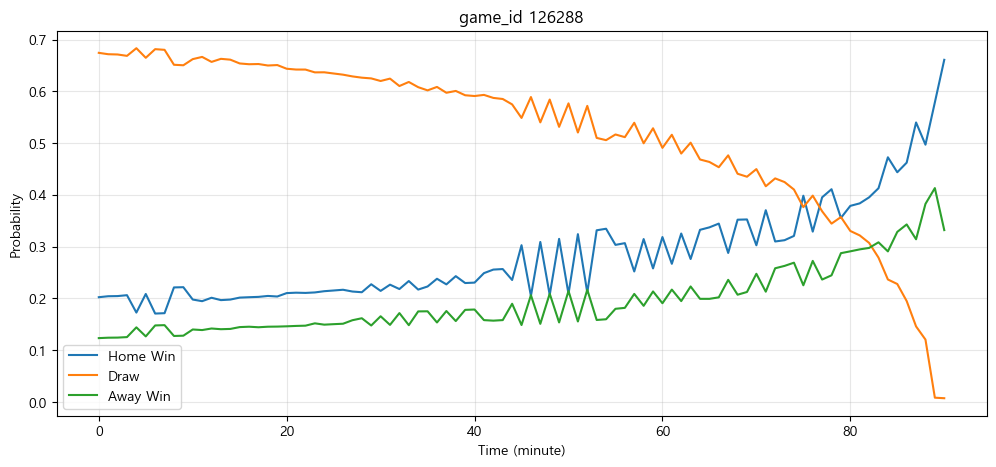

In [134]:
# 시각화를 해보자
plt.figure(figsize=(12,5))

plt.plot(g['time_bin'], g['home_win_prob'], label='Home Win')
plt.plot(g['time_bin'], g['draw_prob'], label='Draw')
plt.plot(g['time_bin'], g['away_win_prob'], label='Away Win')

plt.xlabel('Time (minute)')
plt.ylabel('Probability')
plt.title('game_id 126288')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

In [135]:
#soccer_df.to_csv('C:/Users/USER/Desktop/프로젝트 관련/공모전 데이터/soccer_df.csv')

In [136]:
from scipy.stats import poisson

In [137]:
# state_df 기준
w_xg = 0.15
w_xa = 0.10
w_xt = 0.05

state_df['lambda_diff'] = (
    w_xg * state_df['home_xgdiff'] +
    w_xa * state_df['home_xadiff'] +
    w_xt * state_df['home_xtdiff']
)

In [138]:
state_df['time_scale'] = state_df['remain_time'] / 5400
state_df['lambda_diff'] *= state_df['time_scale']

In [139]:
eps = 0.05

state_df['lambda_home'] = np.clip(
    eps + state_df['lambda_diff'], eps, None
)

state_df['lambda_away'] = np.clip(
    eps - state_df['lambda_diff'], eps, None
)

In [140]:
def poisson_prob_from_state(row, max_goal=6):
    lh = row['lambda_home']
    la = row['lambda_away']
    sd = row['score_diff']

    P_h = poisson.pmf(np.arange(max_goal), lh)
    P_a = poisson.pmf(np.arange(max_goal), la)

    home_win = draw = away_win = 0.0

    for i in range(max_goal):
        for j in range(max_goal):
            p = P_h[i] * P_a[j]

            if sd + i - j > 0:
                home_win += p
            elif sd + i - j == 0:
                draw += p
            else:
                away_win += p

    total = home_win + draw + away_win
    return pd.Series({
        'p_home': home_win / total,
        'p_draw': draw / total,
        'p_away': away_win / total
    })

In [141]:
state_df[['p_home', 'p_draw', 'p_away']] = (
    state_df.apply(poisson_prob_from_state, axis=1)
)

In [142]:
game_id = 126358 # 예시
viz_df = state_df[state_df['game_id'] == game_id].copy()

viz_df

,game_id,time_bin,score_diff,home_xgdiff,home_xadiff,home_xtdiff,remain_time,game_result,log_remain_time,ishome,score_time_weighted,lambda_diff,time_scale,lambda_home,lambda_away,p_home,p_draw,p_away
6595,126358,0,0,-0.000000,-0.000000,-0.016,5356.028,0,8.586165,0,0.000000,-0.000793,0.991857,0.050000,0.050793,0.046414,0.906417,0.047169
6596,126358,1,0,0.000000,0.000000,0.060,5280.067,0,8.571883,1,0.000000,0.002933,0.977790,0.052933,0.050000,0.049107,0.904576,0.046317
6597,126358,2,0,0.000000,0.000000,0.008,5220.899,0,8.560616,1,0.000000,0.000387,0.966833,0.050387,0.050000,0.046800,0.906768,0.046432
6598,126358,3,0,-0.000000,-0.000000,-0.280,5160.759,0,8.549033,0,0.000000,-0.013380,0.955696,0.050000,0.063380,0.045847,0.895643,0.058510
6599,126358,4,0,0.000000,0.000000,0.311,5112.533,0,8.539646,1,0.000000,0.014722,0.946765,0.064722,0.050000,0.059711,0.894501,0.045787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,126358,85,-1,-0.365366,0.304202,-0.166,240.300,2,5.486041,1,-0.955500,-0.001454,0.044500,0.050000,0.051454,0.001149,0.045234,0.953616
6677,126358,86,-1,-0.033252,0.636317,-0.207,180.600,2,5.201806,1,-0.966556,0.001615,0.033444,0.051615,0.050000,0.001225,0.046688,0.952086
6678,126358,88,-1,0.636317,0.636317,-0.209,61.032,2,4.127650,1,-0.988698,0.001680,0.011302,0.051680,0.050000,0.001228,0.046744,0.952028
6679,126358,89,-1,0.636317,0.636317,-0.248,4.432,2,1.692307,1,-0.999179,0.000120,0.000821,0.050120,0.050000,0.001157,0.045402,0.953441


In [143]:

viz_df = viz_df.sort_values('time_bin')viz_df = viz_df.sort_values('time_bin')

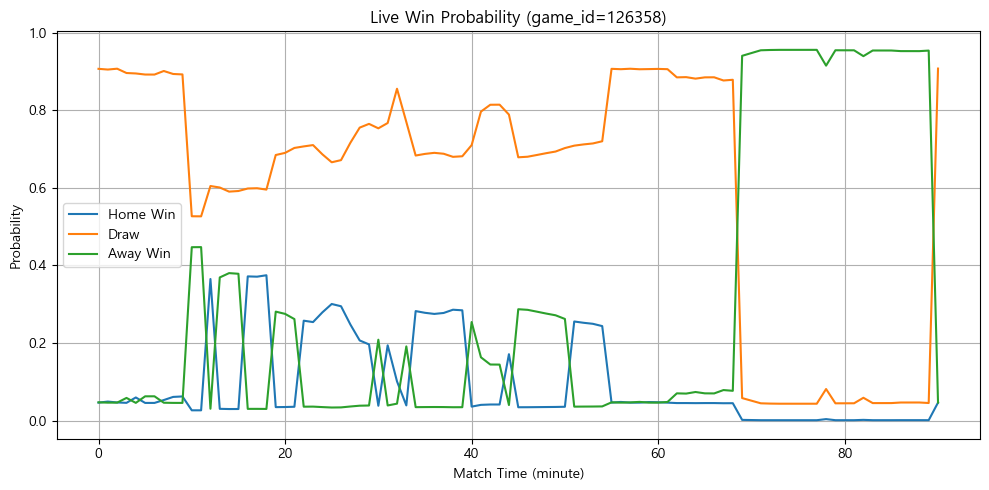

In [144]:
plt.figure(figsize=(10, 5))

plt.plot(viz_df['time_bin'], viz_df['p_home'], label='Home Win')
plt.plot(viz_df['time_bin'], viz_df['p_draw'], label='Draw')
plt.plot(viz_df['time_bin'], viz_df['p_away'], label='Away Win')

plt.xlabel('Match Time (minute)')
plt.ylabel('Probability')
plt.title(f'Live Win Probability (game_id={game_id})')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [145]:
viz_df[['lambda_home', 'lambda_away']].describe()

,lambda_home,lambda_away
count,86.000000,86.000000
mean,0.133019,0.125699
std,0.135935,0.141519
min,0.050000,0.050000
25%,0.050000,0.050000
50%,0.050000,0.050789
75%,0.229101,0.088457
max,0.493256,0.622717


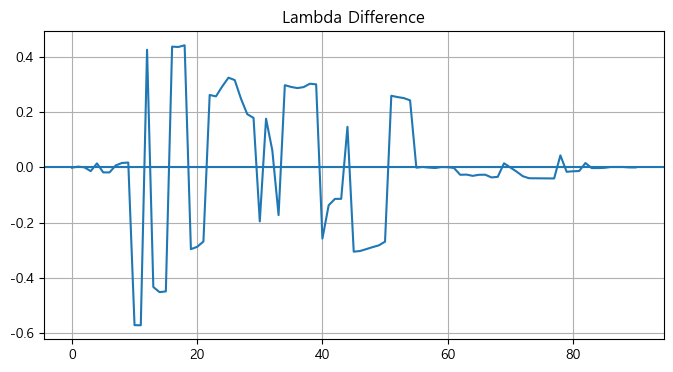

In [146]:
plt.figure(figsize=(8,4))
plt.plot(viz_df['time_bin'], viz_df['lambda_home'] - viz_df['lambda_away'])
plt.axhline(0)
plt.title('Lambda Difference')
plt.grid(True)
plt.show()

In [147]:
feature = ['log_remain_time', 'home_sumxg', 'away_sumxg',
           'home_xgdiff', 'home_xtdiff', ]

x = soccer_df[feature]
y = soccer_df['game_result']
group = state_df['game_id'].unique()

In [148]:
# 훈련 테스트 데이터 분리

train_x, test_x = train_test_split(group,
                                  test_size=0.2,
                                  random_state=40)

train_mask = soccer_df['game_id'].isin(train_x)
test_mask  = soccer_df['game_id'].isin(test_x)

x_train = soccer_df.loc[train_mask, feature]
y_train = soccer_df.loc[train_mask, 'game_result']

x_test  = soccer_df.loc[test_mask, feature]
y_test  = soccer_df.loc[test_mask, 'game_result']

In [149]:
scaler = StandardScaler()
                                                        # 계수와 확률을 안정적으로 추정하기 위함
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)